# Activity: Build a decision tree

## Introduction

This activity simulates the work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. A binomial logistic regression model is used previously to help the airline better understand this data. In this activity, the goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, basic EDA, data cleaning, and other manipulations are needed to prepare the data for modeling.

## Step 1: Imports

Import the relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [2]:
# Standard operational package imports
import pandas as pd
import numpy as np

# Important imports for modeling and evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt

### Load the dataset

In [3]:
# IMPORT DATA.
df_original = pd.read_csv("Invistico_Airline.csv")

In [4]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [5]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [6]:
df_original.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced.

In [7]:
df_original.satisfaction.value_counts(dropna=False)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

### Check for missing values

The sklearn implementation does not support missing values. Check for missing values in the rows of the data. 

In [8]:
df_original.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Check the number of rows and columns in the dataset

In [9]:
df_original.shape

(129880, 22)

**Question:** Why is it important to check how many rows and columns there are in the dataset?

- Being conscious with the size of dataset allows the user to assess the impact of missing values with respect to the rows & columns.  (ie. if they can be safely removed)

### Drop the rows with missing values

In [10]:
df_subset = df_original.dropna(axis=0)

### Validate the cleaning procedure

Check that `df_subset` does not contain any missing values.

In [11]:
df_subset.isna().any(axis=1).sum()

0

### Check the remaining number of rows and columns in the dataset

In [12]:
df_subset.shape

(129487, 22)

### Encode the data

There were four variables belong to the object dtype, such as `satisfaction`, `Customer Type`, `Type of Travel`, `Class`. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [13]:
class_rank = {"Eco": 1, "Eco Plus": 2, "Business": 3}
df_subset['Class'] = df_subset['Class'].map(class_rank)

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0`. 

In [14]:
df_subset['satisfaction'] = pd.get_dummies(df_subset['satisfaction'], drop_first=True) 

### Convert categorical columns into numeric

In [15]:
df_subset = pd.get_dummies(df_subset, drop_first=True, columns=['Customer Type', 'Type of Travel'])
df_subset.rename(columns={'Customer Type_disloyal Customer': 'Loyalty', 'Type of Travel_Personal Travel': 'Travel_Objective'}, inplace=True)

In [16]:
df_subset.dtypes

satisfaction                           uint8
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Loyalty                                uint8
Travel_Objective                       uint8
dtype: obj

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df_subset.drop(columns='satisfaction').copy()
y = df_subset['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Step 3: Model building

### Fit a decision tree classifier model to the data

In [18]:
decision_tree = DecisionTreeClassifier(random_state=0)
dtree_clf = decision_tree.fit(X_train, y_train)

dt_pred = dtree_clf.predict(X_test)

**Question:** What are some advantages of using decision trees versus other learnt models? 

- Decision Tree technique often requires less preprocessing, and it can work easily with all types of variables {continuous, categorical, discrete}. 

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [19]:
print('Scores of baseline model')
print(f'Accuracy: {metrics.accuracy_score(y_test, dt_pred):.4f}')
print(f'Precision: {metrics.precision_score(y_test, dt_pred):.4f}')
print(f'Recall: {metrics.recall_score(y_test, dt_pred):.4f}')
print(f'F1: {metrics.f1_score(y_test, dt_pred):.4f}')

Scores of baseline model
Accuracy: 0.9354
Precision: 0.9429
Recall: 0.9390
F1: 0.9409


**Question:** Are there any additional steps that could take to improve the performance or function of the current decision tree?

- Decision trees can be particularly susceptible to overfitting. Combining hyperparameter tuning and grid search can help ensure this doesn't happen. For instance, setting an appropriate value for max depth could potentially help reduce a decision tree's overfitting problem by limiting how deep a tree can grow. 

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

In [20]:
def conf_matrix_plot(clf_model, x_data, y_data): 
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    '''
 
    y_pred = clf_model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, y_pred, labels=clf_model.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_model.classes_)
    
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()


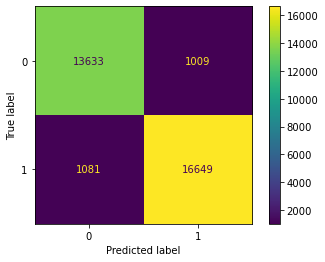

In [21]:
conf_matrix_plot(dtree_clf, X_test, y_test)

**Question:** What patterns can be identified between true positives and true negatives, as well as false positives and false negatives?

- As there are a high proportion of true positives & true negatives and the false positives & false negatives are somewhat close to each other, it means that the model is relatively well balanced and accurate. 

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

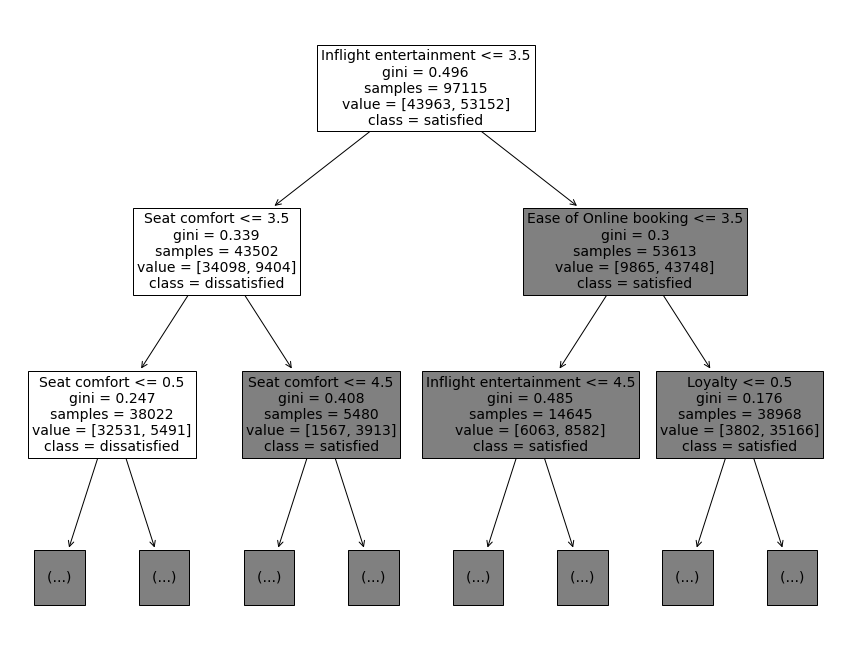

In [37]:
plt.figure(figsize=(15,12))
plot_tree(dtree_clf, max_depth=2, fontsize=14, feature_names=X.columns,
          class_names={0: 'dissatisfied', 1: 'satisfied'}, filled=False)
plt.show()

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. This section will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation.   

In [23]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics.

In [24]:
%%time
CV_clf = GridSearchCV(DecisionTreeClassifier(), tree_para, scoring=scoring, cv=10, refit="f1", n_jobs=2)
CV_clf.fit(X_train, y_train)

CPU times: user 12.3 s, sys: 4 s, total: 16.3 s
Wall time: 9min 23s


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

### Compute the best combination of values for the hyperparameters

In [25]:
CV_clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Question:** What is the best combination of values for the hyperparameters? 

- max_depth=16, max_samples_leaf=3 

In [26]:
CV_clf.best_score_

0.9449830529348077

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [27]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a desired model name {string} and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [35]:
result_table = make_results("Tuned Decision Tree", CV_clf)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.944983,0.938271,0.951796,0.940205


**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

- No, considering that the model performance is not heavily emphasized in this case & no meaningful difference is rendered from the hyperparameter tuning.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring, and allow the "best" decision tree to be reviewed.

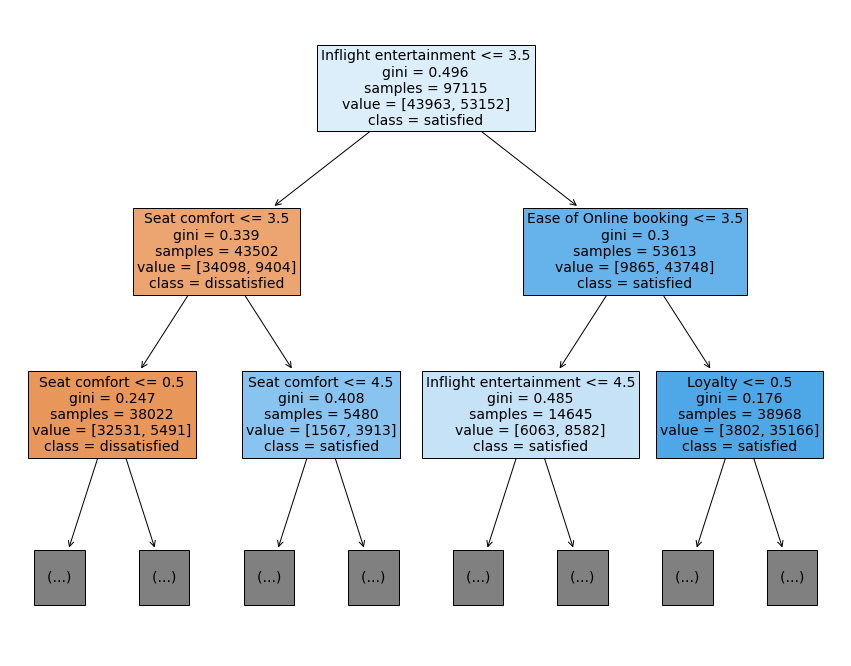

In [34]:
plt.figure(figsize=(15, 12))
opt_dtree = DecisionTreeClassifier(max_depth=16, min_samples_leaf=3, random_state=0)
plot_tree(opt_dtree.fit(X_train, y_train), max_depth=2, fontsize=14, feature_names=X.columns,
         class_names={0: 'dissatisfied', 1: 'satisfied'}, filled=True)
plt.show()

Which features did the model use first to sort the samples?

- The in-flight entertainment provided by the airline company. 

## Conclusion

**What findings would you share with others?**

*   Decision trees accurately predicted satisfaction over 94 percent of the time.  
*   The confusion matrix is useful as it shows a similar number of true positives and true negatives. 
*   The visualization of the decision tree and the feature importance graph both suggest that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features in the model.

**What would you recommend to stakeholders?**
 
*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction. 
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction. 